In [53]:
%reset -f
import sys
sys.path.insert(0,'..')
from wavhandler import *
from configs import *
from utils_train import *
from utils import *
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

normalized = False

In [54]:
d = DatasetConfiguration(names=['twin_cages'])
d.select_all()
d.read()
d.clean()
d.labels.value_counts()

Dataset - twin_cages - exists: True


through    303
free        28
Name: labels, dtype: int64

In [55]:
free = make_df_parallel(names=d.fnames[d.labels=='free'].tolist(), setting='psdflt')
through = make_df_parallel(names=d.fnames[d.labels=='through'].tolist(), setting='psdflt').sample(free.shape[0])

if normalized:
    free = pd.DataFrame(preprocessing.normalize(free.values, norm='l2'))
    through = pd.DataFrame(preprocessing.normalize(through.values, norm='l2'))

# scores (sum of l2 norm)
free_scores = get_clean_wingbeats_multiple_runs(names=d.fnames[d.labels=='free'].tolist())
through_scores = get_clean_wingbeats_multiple_runs(names=d.fnames[d.labels=='through'].tolist())
print(f"free shape: {free.shape}, through shape: {through.shape}")

free shape: (28, 4097), through shape: (28, 4097)


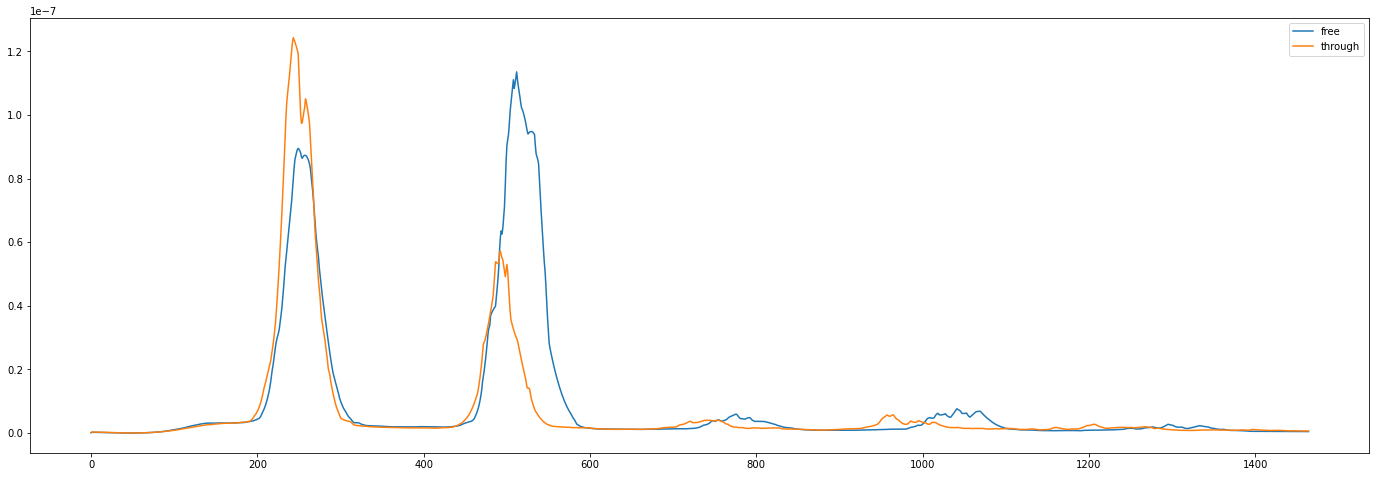

In [56]:
plt.figure(figsize=(24,8))
free.iloc[:,:1500].median().plot()
through.iloc[:,:1500].median().plot()
plt.legend(['free','through'])

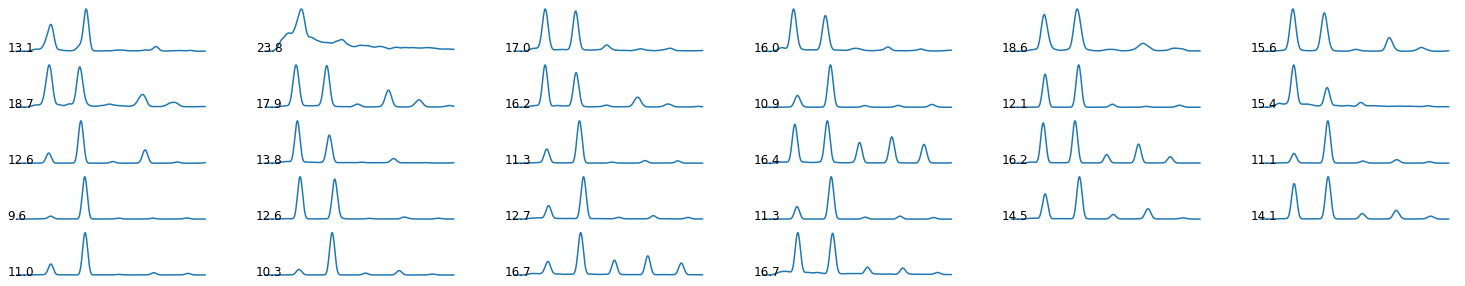

In [57]:
plt.figure(figsize=(26,6))
for i in range(len(free)):
    plt.subplot(6,6,i+1)
    free.iloc[i,:1500].plot()
    plt.title(f"{free_scores.iloc[i]:.1f}", loc='left', y=-.1)
    plt.axis('off')

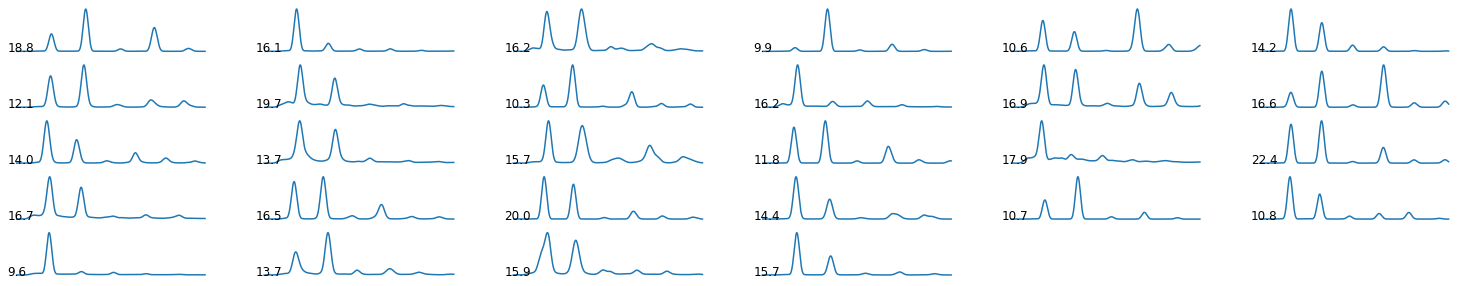

In [58]:
plt.figure(figsize=(26,6))
for i in range(len(free)):
    plt.subplot(6,6,i+1)
    through.iloc[i,:1500].plot()
    plt.title(f"{through_scores.iloc[i]:.1f}", loc='left', y=-.1)
    plt.axis('off')    
    plt.axis('off')

In [62]:
print(f"free: {free_scores.mean()}, through: {through_scores.mean()}")

free: 14.503737326501613, through: 14.184079133568295


## Raw signal (free / through)

In [124]:
free = make_df_parallel(names=d.fnames[d.labels=='free'].tolist(), setting='rawflt')
through = make_df_parallel(names=d.fnames[d.labels=='through'].tolist(), setting='rawflt').sample(free.shape[0])

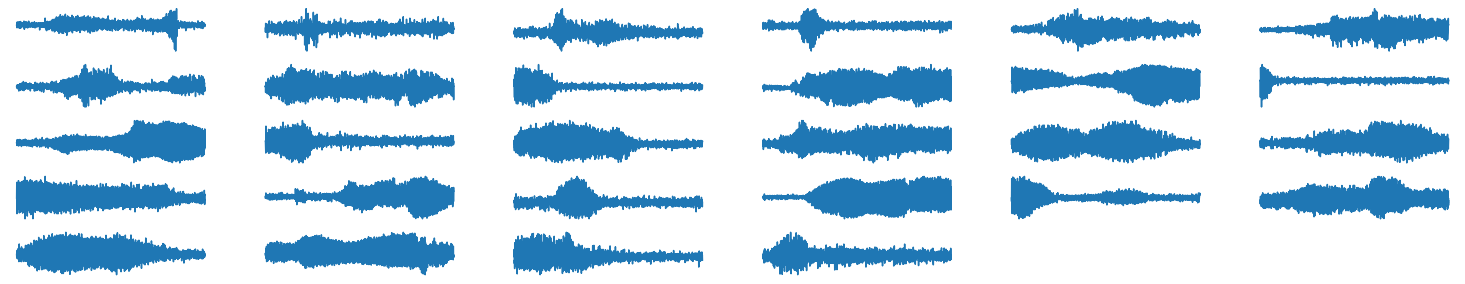

In [125]:
plt.figure(figsize=(26,6))
for i in range(len(free)):
    plt.subplot(6,6,i+1)
    free.iloc[i,:].plot()
    plt.axis('off')

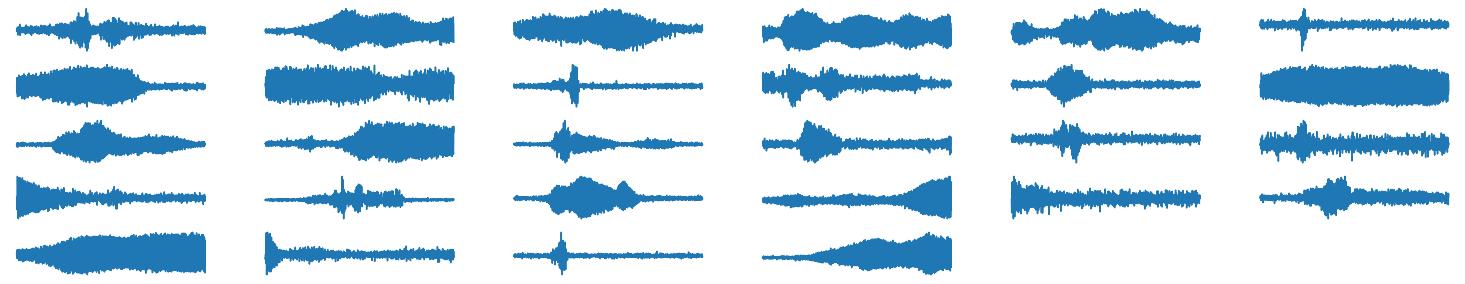

In [126]:
plt.figure(figsize=(26,6))
for i in range(len(free)):
    plt.subplot(6,6,i+1)
    through.iloc[i,:].plot()
    plt.axis('off')    

### Date ranges

Dataset - twin_cages - exists: True


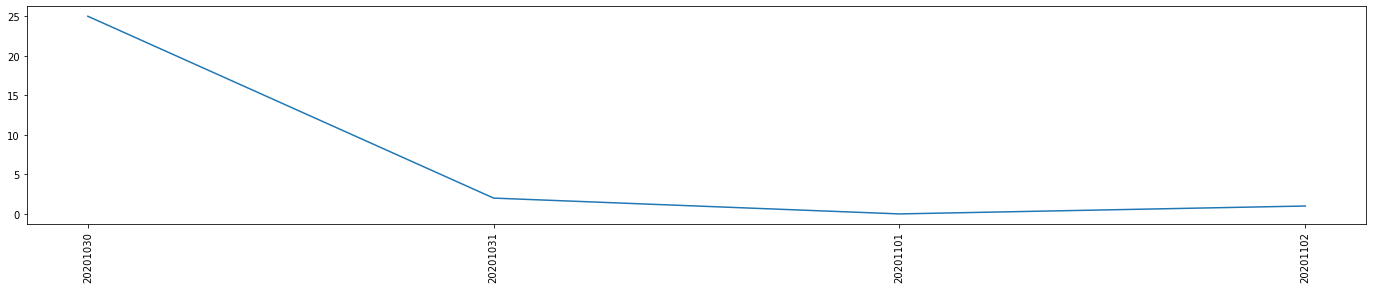

In [119]:
dfree = DatasetConfiguration(names=['twin_cages'])
dfree.select(name='twin_cages', species=['free'])
dfree.read()
dfree.clean()
dfree.parse_filenames()
dfree.plot_daterange()

Dataset - twin_cages - exists: True


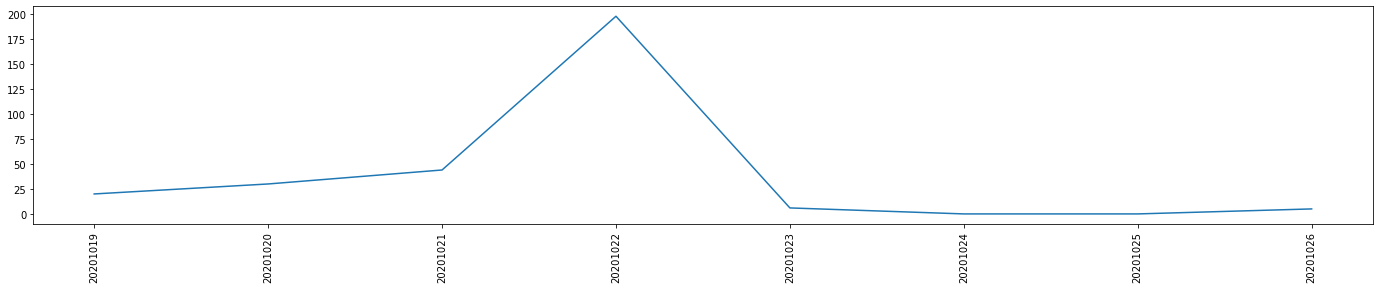

In [120]:
dthrough = DatasetConfiguration(names=['twin_cages'])
dthrough.select(name='twin_cages', species=['through'])
dthrough.read()
dthrough.clean()
dthrough.parse_filenames()
dthrough.plot_daterange()

## Activity times

In [111]:
ds = Dataset('twin_cages')
ds.read()
ds.target_classes

Species: all.
Read 412 filenames in 0.00 seconds.
Loaded data into matrix in 0.23 seconds.


['free', 'through']

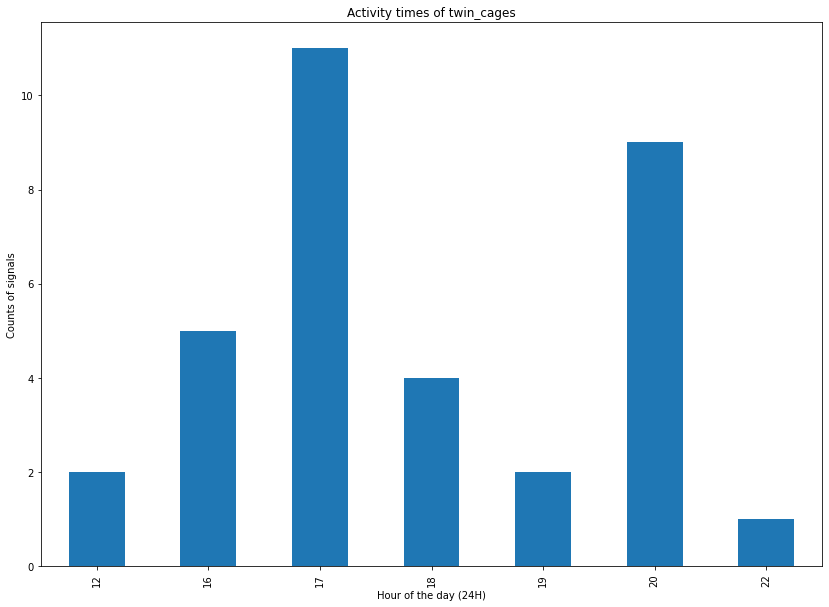

In [109]:
ds.plot_activity_times(species='free')

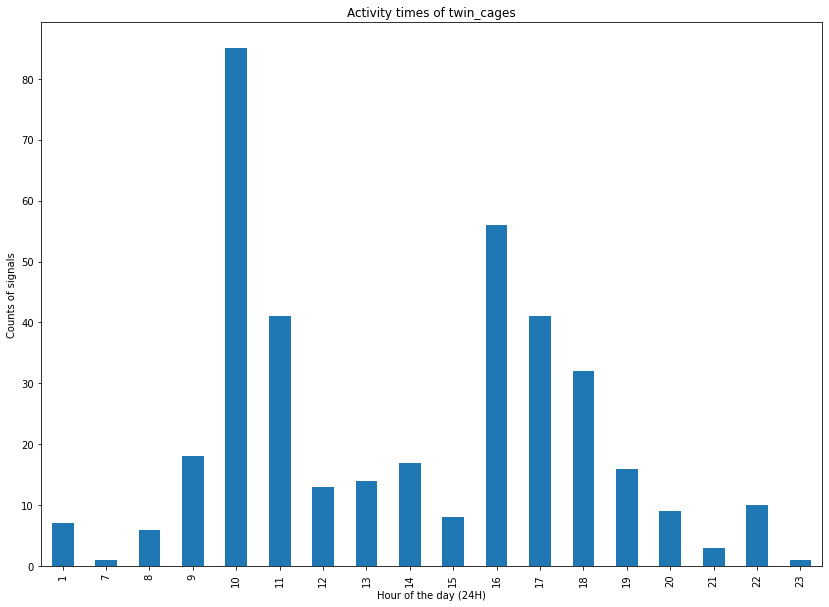

In [110]:
ds.plot_activity_times(species='through')

# RPi captured signals

In [64]:
dd = DatasetConfiguration(names=['twin_cages_pi'])
dd.select_all()
dd.read()
dd.clean()
dd.labels.value_counts()

Dataset - twin_cages_pi - exists: True


through    167
free        14
Name: labels, dtype: int64

In [66]:
free = make_df_parallel(names=dd.fnames[dd.labels=='free'].tolist(), setting='psdflt')
through = make_df_parallel(names=dd.fnames[dd.labels=='through'].tolist(), setting='psdflt').sample(free.shape[0])

if normalized:
    free = pd.DataFrame(preprocessing.normalize(free.values, norm='l2'))
    through = pd.DataFrame(preprocessing.normalize(through.values, norm='l2'))

# scores (sum of l2 norm)
free_scores = get_clean_wingbeats_multiple_runs(names=dd.fnames[dd.labels=='free'].tolist())
through_scores = get_clean_wingbeats_multiple_runs(names=dd.fnames[dd.labels=='through'].tolist())
print(f"free shape: {free.shape}, through shape: {through.shape}")

free shape: (14, 4097), through shape: (14, 4097)


## free

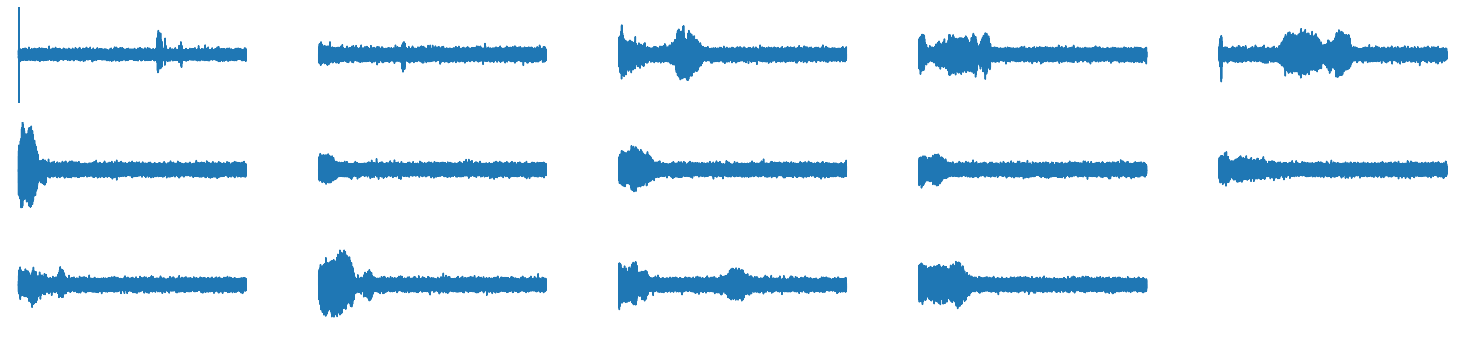

In [99]:
free = make_df_parallel(names=dd.fnames[dd.labels=='free'].tolist(), setting='rawflt')
# for i, sub in free.iterrows():
#     sub.plot()
plt.figure(figsize=(26,6))
for i in range(len(free)):
    plt.subplot(3,5,i+1)
    free.iloc[i,:].plot()
    plt.axis('off')    
    plt.ylim(-.04,.04)

## through

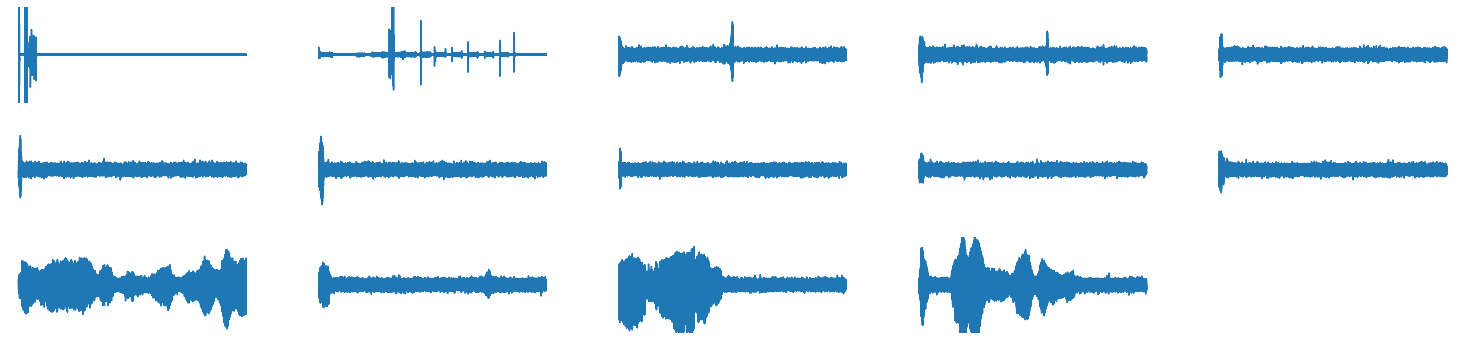

In [98]:
through = make_df_parallel(names=dd.fnames[dd.labels=='through'].tolist(), setting='rawflt')
# for i, sub in free.iterrows():
#     sub.plot()
plt.figure(figsize=(26,6))
for i in range(len(free)):
    plt.subplot(3,5,i+1)
    through.iloc[i,:].plot()
    plt.axis('off')    
    plt.ylim(-.04,.04)